In [1]:
#importing the required libraries
#Data wrangling
import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth",1000)#setting maximum column width
#data visualization
import seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt
#To create wordcloud
plt.rcParams["figure.figsize"] = (8,8)

In [2]:
df=pd.read_csv('Preprocessed data.csv')

In [3]:
books_df=pd.read_csv('books_cleaned.csv')

In [4]:
df.head()

ISBN  \
0    2005018   
1   60973129   
2  374157065   
3  399135782   
4  425176428   

                                                                                           Book-Title  \
0                                                                                        Clara Callan   
1                                                                                Decision in Normandy   
2  Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It   
3                                                                              The Kitchen God's Wife   
4                     What If?: The World's Foremost Military Historians Imagine What Might Have Been   

            Book-Author  Year-Of-Publication                 Publisher  \
0  RICHARD BRUCE WRIGHT                 2001     HarperFlamingo Canada   
1          CARLO D'ESTE                 1991           HarperPerennial   
2      GINA BARI KOLATA                 1999      Farrar Straus Giroux   
3               AMY TAN                 1991          Putnam Pub Group   
4         ROBERT COWLEY                 2000  Berkley Publishing Group   

                                                    Image-URL-L  User-ID  \
0  http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg        8   
1  http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg        8   
2  http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg        8   
3  http://images.amazon.com/images/P/0399135782.01.LZZZZZZZ.jpg        8   
4  http://images.amazon.com/images/P/0425176428.01.LZZZZZZZ.jpg        8   

   Book-Rating  Age Age_group Country  
0            5   16     Teens  CANADA  
1            8   16     Teens  CANADA  
2            7   16     Teens  CANADA  
3            9   16     Teens  CANADA  
4            8   16     Teens  CANADA

In [5]:
df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-L', 'User-ID', 'Book-Rating', 'Age', 'Age_group', 'Country'],
      dtype='object')

## Popularity Based Recommendation System

#### It is a type of recommendation system that bases choices on factors like popularity and/or current trends.

### Simple Popularity based recommendation system

In [6]:
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
import requests

In [47]:
def most_popular(df, n):
    if n >= 1 and n <= len(df):
        popular = df.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False).head(n)
        dt=pd.merge(popular, books_df, on='ISBN')
        return(dt[['Book-Title','Book-Author','Book-Rating']])
    else:
        return 'Please enter a valid value of n!'

In [27]:
popular=df.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False).head(6)

In [28]:
d1=pd.merge(popular, books_df, on='ISBN')

In [30]:
d1=d1[['Book-Title','Book-Author','Book-Rating']]

In [31]:
d1.to_clipboard()

In [12]:
most_popular(df, 6)

Book-Title    Book-Author
0                                      Wild Animus   RICH SHAPERO
1                        The Lovely Bones: A Novel   ALICE SEBOLD
2                                The Da Vinci Code      DAN BROWN
3  Divine Secrets of the Ya-Ya Sisterhood: A Novel  REBECCA WELLS
4              The Red Tent (Bestselling Backlist)  ANITA DIAMANT
5                                  A Painted House   JOHN GRISHAM

In [32]:
# function for getting most popular recommendations

def most_popular1(df, n):
    if n >= 1 and n <= len(df):
        popular = df.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False).head(n)
        dt= pd.merge(popular, books_df, on='ISBN')
        fig, axs = plt.subplots(1,n ,figsize=(18,5))
        fig.suptitle('Most Popular Books Among Readers', size = 22)
        for i in range(len(dt['Book-Title'].tolist())):
            url = books_df.loc[books_df['Book-Title'] == dt['Book-Title'].tolist()[i],'Image-URL-L'][:1].values[0]
            headers ={
        'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36'
    }
            im = Image.open(requests.get(url,headers=headers, stream=True).raw)
            axs[i].imshow(im)
            axs[i].axis("off")
            axs[i].set_title('Count :{} '.format(dt['Book-Rating'][i]),
                                 y=-0.18,
                                     color="green",
                                     fontsize=10)
            fig.show()
    else:
        return 'Please enter a valid value of n!'

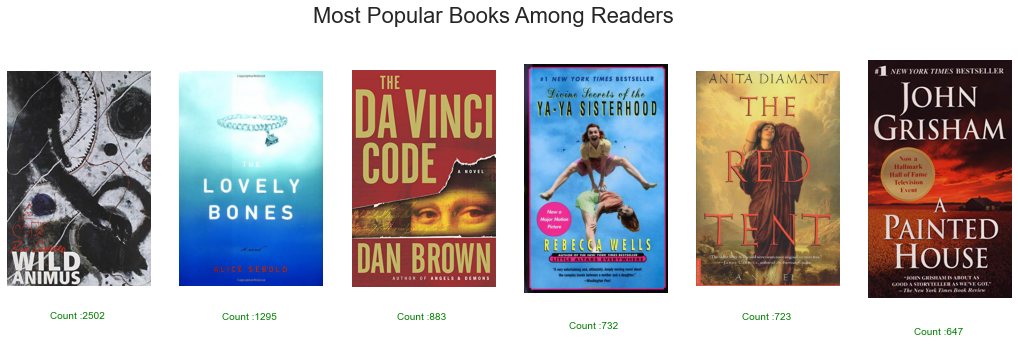

In [33]:
most_popular1(df, 6)

### Country-based book recommendation

In [50]:
if 'CANADA' in list(df.Country.unique()):
    dt= most_popular(df[df['Country'] == 'CANADA'], 5) # calling most_popular function to get popular recommendations
dt

Book-Title   Book-Author  Book-Rating
0                            Wild Animus  RICH SHAPERO          235
1              The Lovely Bones: A Novel  ALICE SEBOLD          118
2                      The Pelican Brief  JOHN GRISHAM           88
3  She's Come Undone (Oprah's Book Club)    WALLY LAMB           88
4                      The Joy Luck Club       AMY TAN           86

In [52]:
dt.to_clipboard()

In [43]:
# function for getting most popular recommendations country wise
def country_popular(df, country):
    if country in list(df.Country.unique()):
        dt= most_popular(df[df['Country'] == country], 5) # calling most_popular function to get popular recommendations
        fig, axs = plt.subplots(1,5 ,figsize=(18,5))
        fig.suptitle('Most Popular Books in '+str(country)+' ', size = 22)
        for i in range(len(dt['Book-Title'].tolist())):
            url = books_df.loc[books_df['Book-Title'] == dt['Book-Title'].tolist()[i],'Image-URL-L'][:1].values[0]
            headers ={
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36'
}
            im = Image.open(requests.get(url,headers=headers, stream=True).raw)
            axs[i].imshow(im)
            axs[i].axis("off")
            axs[i].set_title(format(dt['Book-Title'][i]),
                             y=-0.18,
                                 color="green",
                                 fontsize=10)
            fig.show()
    else:
        print('This country is not present in the dataset. Please enter some other country.')

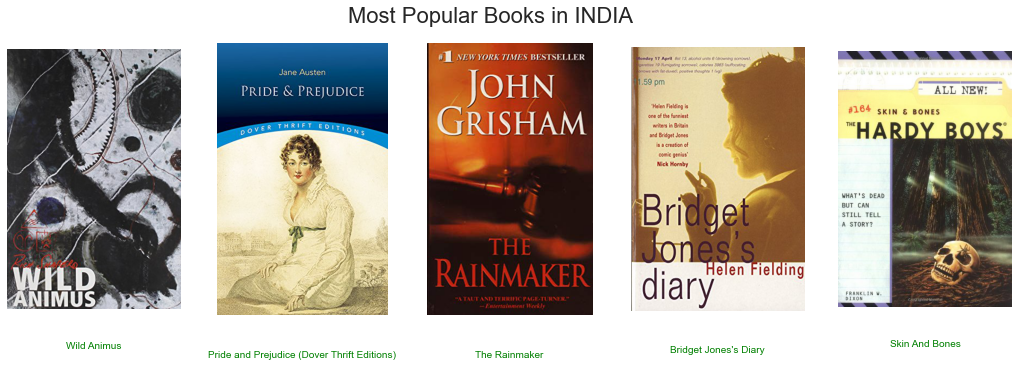

In [11]:
country_popular(df,'INDIA')

Enter the Name of the Country : CANADA


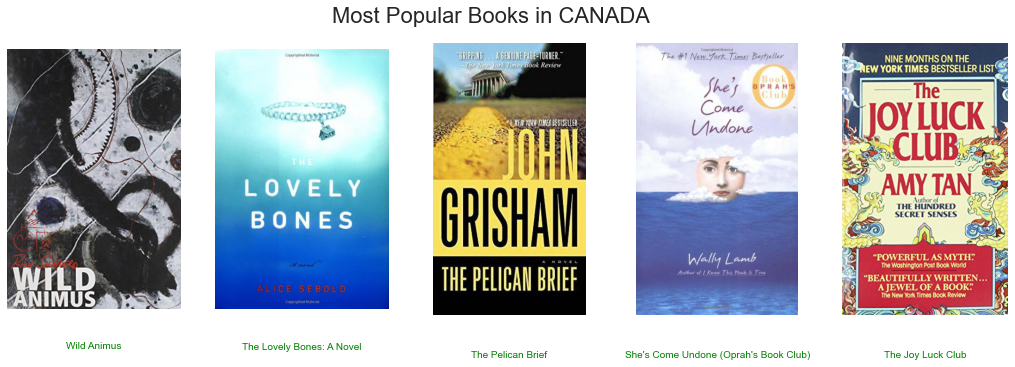

In [51]:
country=input('Enter the Name of the Country : ')
country_popular(df,country)

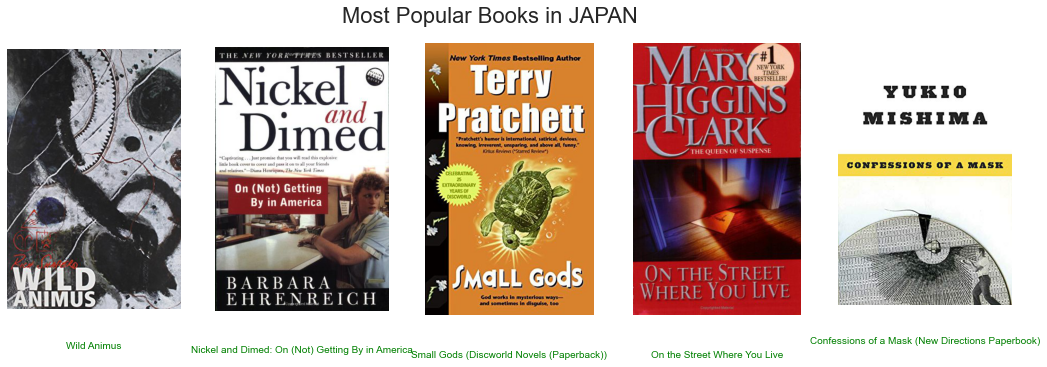

In [12]:
country_popular(df,'JAPAN')

### Weighted average rating method

Using Weighted average for each Book’s Average Rating

#### W = (Rv + Cm)/(v + m)

where

W= Weighted Rating

R = Average of the Books rating

v = No of people who have rated the books(number of votes)

m = minimum no of votes to be listed

C = the mean rating across all the books

In [62]:
#finding the average rating and number of votes received by books
df_relevant_data = df.groupby(['ISBN','Book-Title','Book-Author'],as_index=False).agg(avg_rating=('Book-Rating','mean'),ratings_count=('Book-Rating','count'))
v=df_relevant_data['ratings_count']
R=df_relevant_data['avg_rating']
C=df_relevant_data['avg_rating'].mean()
m=int(df_relevant_data['ratings_count'].quantile(0.90))#minimum number of votes to be listed
print(f'The average rating of all the books is {C} and the minimum number of votes required by the books to be listed is {m}  ')

The average rating of all the books is 7.5483691848962735 and the minimum number of votes required by the books to be listed is 11  


In [64]:
#Calculating weighted average rating of the books
df_relevant_data['weighted_average']=round(((R*v)+ (C*m))/(v+m),2)

In [65]:
df_relevant_data.sort_values(by='weighted_average',ascending=False).head(10)

ISBN  \
49200   345339738   
49199   345339711   
72885   440174643   
88926   553213172   
80527   451192001   
72472   439425220   
4846   055321313X   
3808   043936213X   
10159   140042393   
7824   081297106X   

                                                           Book-Title  \
49200          The Return of the King (The Lord of the Rings, Part 3)   
49199                  The Two Towers (The Lord of the Rings, Part 2)   
72885                                                           Roots   
88926                                              Anne of the Island   
80527                                  How Stella Got Her Groove Back   
72472           Harry Potter and the Chamber of Secrets Postcard Book   
4846   Anne of Green Gables (Anne of Green Gables Novels (Paperback))   
3808                   Harry Potter and the Sorcerer's Stone (Book 1)   
10159                                             The Grapes of Wrath   
7824                      Reading Lolita in Tehran: A Memoir in Books   

                Book-Author  avg_rating  ratings_count  weighted_average  
49200        J.R.R. TOLKIEN    9.734104            173              9.60  
49199        J.R.R. TOLKIEN    9.587571            177              9.47  
72885            ALEX HALEY    9.770492             61              9.43  
88926  LUCY MAUD MONTGOMERY    9.666667             84              9.42  
80527        TERRY MCMILLAN    9.662791             86              9.42  
72472         J. K. ROWLING    9.925000             40              9.41  
4846        L.M. MONTGOMERY    9.557252            131              9.40  
3808          J. K. ROWLING    9.596154            104              9.40  
10159        JOHN STEINBECK    9.649351             77              9.39  
7824            AZAR NAFISI    9.591837             98              9.39

In [76]:
dw1=df_relevant_data.sort_values(by='weighted_average',ascending=False).head(5)

In [87]:
dw1=dw1[['ISBN','weighted_average']]

In [88]:
d1=pd.merge(dw1, books_df, on='ISBN')

In [89]:
d1=d1[['Book-Title','Book-Author','weighted_average']]

In [92]:
d1.to_clipboard()

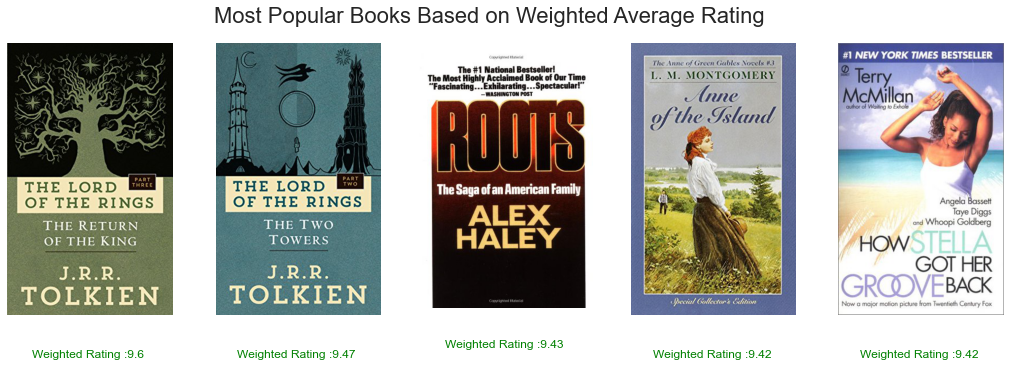

In [91]:
        dt= pd.merge(dw1, books_df, on='ISBN')
        fig, axs = plt.subplots(1,5 ,figsize=(18,5))
        fig.suptitle('Most Popular Books Based on Weighted Average Rating', size = 22)
        for i in range(len(dt['Book-Title'].tolist())):
            url = books_df.loc[books_df['Book-Title'] == dt['Book-Title'].tolist()[i],'Image-URL-L'][:1].values[0]
            headers ={
        'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36'
    }
            im = Image.open(requests.get(url,headers=headers, stream=True).raw)
            axs[i].imshow(im)
            axs[i].axis("off")
            axs[i].set_title('Weighted Rating :{} '.format(dt['weighted_average'][i]),
                                 y=-0.18,
                                     color="green",
                                     fontsize=12)
            fig.show()

####  This is the list of most favored books based on the weighted rating scores. The book 'The Return of the King (The Lord of the Rings, Part 3)' seems to have top this chart.

### Author based recommender system

In [93]:
def author_based(book_title,number,df_relevant_data=df_relevant_data): 
    '''
    To recommend books from the same author as the book entered by the user
    '''
    author=df_relevant_data.loc[df_relevant_data['Book-Title']==book_title]['Book-Author'].unique()[0]
    author_df=df_relevant_data.loc[(df_relevant_data['Book-Author']==author)].sort_values(by='weighted_average',ascending=False)
    print(f'The author of the book {book_title} is {author}\n')
    print(f'Here are the top {number} books from the same author\n')
    top_rec=author_df.loc[(author_df['Book-Title']!=book_title),['ISBN','Book-Title','weighted_average']].head(number)
    return(top_rec)

In [100]:
#get book name and number of books to recommend
book_title = 'Harry Potter and the Chamber of Secrets (Book 2)'
number =5
aut=author_based(book_title,number)
# top_recommendations from the same author

The author of the book Harry Potter and the Chamber of Secrets (Book 2) is J. K. ROWLING

Here are the top 5 books from the same author



In [113]:
aut=author_based(book_title,5)

The author of the book Harry Potter and the Chamber of Secrets (Book 2) is J. K. ROWLING

Here are the top 5 books from the same author



In [115]:
aut.to_clipboard()

In [103]:
aut=aut.drop('Book-Title',axis=1)

In [108]:
author_recc=pd.merge(books_df,aut,how='inner',on='ISBN').sort_values(by='weighted_average',ascending=False).reset_index()
author_recc

index        ISBN  \
0      4   439425220   
1      3  043936213X   
2      0  059035342X   
3      1   439139597   
4      2   439136369   

                                                         Book-Title  \
0             Harry Potter and the Chamber of Secrets Postcard Book   
1                    Harry Potter and the Sorcerer's Stone (Book 1)   
2  Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))   
3                      Harry Potter and the Goblet of Fire (Book 4)   
4                 Harry Potter and the Prisoner of Azkaban (Book 3)   

     Book-Author  Year-Of-Publication               Publisher  \
0  J. K. ROWLING                 2002              Scholastic   
1  J. K. ROWLING                 2001              Scholastic   
2  J. K. ROWLING                 1999  Arthur A. Levine Books   
3  J. K. ROWLING                 2000              Scholastic   
4  J. K. ROWLING                 2001              Scholastic   

                                                    Image-URL-L  \
0  http://images.amazon.com/images/P/0439425220.01.LZZZZZZZ.jpg   
1  http://images.amazon.com/images/P/043936213X.01.LZZZZZZZ.jpg   
2  http://images.amazon.com/images/P/059035342X.01.LZZZZZZZ.jpg   
3  http://images.amazon.com/images/P/0439139597.01.LZZZZZZZ.jpg   
4  http://images.amazon.com/images/P/0439136369.01.LZZZZZZZ.jpg   

   weighted_average  
0              9.41  
1              9.40  
2              9.38  
3              9.38  
4              9.37

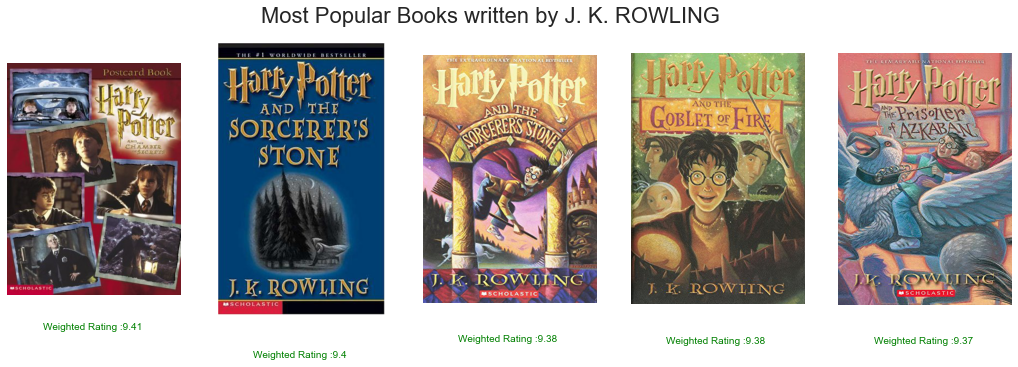

In [109]:
author=df_relevant_data.loc[df_relevant_data['Book-Title']==book_title]['Book-Author'].unique()[0]
fig, axs = plt.subplots(1,5 ,figsize=(18,5))
fig.suptitle('Most Popular Books written by '+str(author)+' ', size = 22)
for i in range(len(author_recc['Book-Title'].tolist())):
    url = books_df.loc[books_df['ISBN'] == author_recc['ISBN'].tolist()[i],'Image-URL-L'][:1].values[0]
    headers ={
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36'
}
    im = Image.open(requests.get(url,headers=headers, stream=True).raw)
    axs[i].imshow(im)
    axs[i].axis("off")
    axs[i].set_title('Weighted Rating :{} '.format(author_recc['weighted_average'][i]),
                             y=-0.18,
                                 color="green",
                                 fontsize=10)
    fig.show()

Enter the name of the book :Harry Potter and the Chamber of Secrets (Book 2)
The author of the book Harry Potter and the Chamber of Secrets (Book 2) is J. K. ROWLING

Here are the top 5 books from the same author



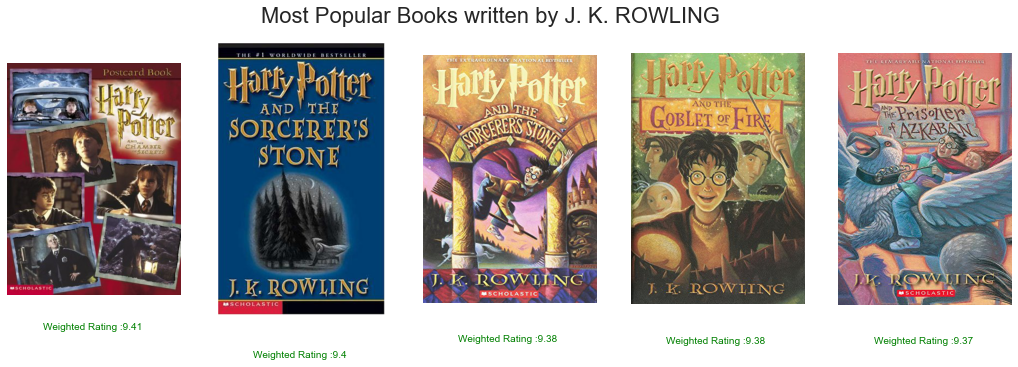

In [112]:
book_title=input('Enter the name of the book :')
aut=author_based(book_title,5)
aut=aut.drop('Book-Title',axis=1)
author_recc=pd.merge(books_df,aut,how='inner',on='ISBN').sort_values(by='weighted_average',ascending=False).reset_index()
author=df_relevant_data.loc[df_relevant_data['Book-Title']==book_title]['Book-Author'].unique()[0]
fig, axs = plt.subplots(1,5 ,figsize=(18,5))
fig.suptitle('Most Popular Books written by '+str(author)+' ', size = 22)
for i in range(len(author_recc['Book-Title'].tolist())):
    url = books_df.loc[books_df['ISBN'] == author_recc['ISBN'].tolist()[i],'Image-URL-L'][:1].values[0]
    headers ={
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36'
}
    im = Image.open(requests.get(url,headers=headers, stream=True).raw)
    axs[i].imshow(im)
    axs[i].axis("off")
    axs[i].set_title('Weighted Rating :{} '.format(author_recc['weighted_average'][i]),
                             y=-0.18,
                                 color="green",
                                 fontsize=10)
    fig.show()
